## Imports

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from datetime import datetime
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Importing the datasets
train_data = pd.read_csv("analysisData.csv")
train_data.shape

F:\Installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(36839, 91)

In [3]:
test_data = pd.read_csv("scoringData.csv")
test_data.shape

F:\Installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (31,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9210, 90)

In [6]:
my_submission = pd.DataFrame({'id': test_data['id']})
my_submission.head()

,id
0,23136
1,37597
2,38982
3,42288
4,45375


In [7]:
my_submission.shape

(9210, 1)

In [8]:
# Viewing the column headings
train_data.columns

Index(['id', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
     

In [9]:
# Identifying the unique number of values in the dataset
train_data.nunique()

id                                              36839
name                                            36310
summary                                         33741
space                                           26144
description                                     35534
neighborhood_overview                           21898
notes                                           14541
transit                                         22948
access                                          20054
interaction                                     20449
house_rules                                     21068
host_name                                        9693
host_since                                       3574
host_location                                    1212
host_about                                      18385
host_response_time                                  4
host_response_rate                                 79
host_acceptance_rate                                0
host_is_superhost           

In [10]:
train_data.isna().sum()

id                                                  0
name                                                0
summary                                          1407
space                                            9260
description                                       402
neighborhood_overview                           12235
notes                                           20576
transit                                         11330
access                                          13959
interaction                                     13822
house_rules                                     13208
host_name                                           1
host_since                                          1
host_location                                      90
host_about                                      13194
host_response_time                              13241
host_response_rate                              13241
host_acceptance_rate                            36839
host_is_superhost           

## Data Preprocessing

In [11]:
# Dropping columns which will be of no use for our model
col_list = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
            'house_rules', 'host_name', 'host_about', 'amenities', 'license', 'jurisdiction_names', 'host_acceptance_rate',
            'square_feet', 'monthly_price', 'weekly_price', 'id', 'neighbourhood', 'host_listings_count', 'availability_30',
            'availability_90', 'calculated_host_listings_count_entire_homes', 'minimum_minimum_nights', 
            'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights']

In [12]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [13]:
# Function to extraxt year and month from datetime data
def conv_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [14]:
date_list = ['host_since', 'first_review', 'last_review']
conv_date(date_list)

In [15]:
# Function to obtain year and month from datetime data
def get_year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def get_month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)

In [16]:
get_year('host_since_year', 'host_since')
get_month('host_since_month', 'host_since')
get_year('first_review_year', 'first_review')
get_month('first_review_month', 'first_review')
get_year('last_review_year', 'last_review')
get_month('last_review_month', 'last_review')

In [17]:
col_list = ['host_since', 'first_review', 'last_review']

In [18]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

### Imputing Missing Data

In [19]:
train_data.isna().sum()

host_location                                      90
host_response_time                              13241
host_response_rate                              13241
host_is_superhost                                   1
host_neighbourhood                               4955
host_total_listings_count                           1
host_verifications                                  0
host_has_profile_pic                                1
host_identity_verified                              1
street                                              0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
city                                               47
state                                               6
zipcode                                           452
market                                             86
smart_location                                      0
country_code                                        0
country                     

In [20]:
# Function to impute with None
def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')

In [21]:
imp_none_list = ['host_location', 'host_response_time', 'host_response_rate', 'host_neighbourhood', 'city', 'state', 'zipcode',
                 'market']
impute_none(imp_none_list)

In [22]:
# Function to impute with False
def impute_false(imp_false_list):
    for i in imp_false_list:
        train_data[i] = train_data[i].fillna('f')
        test_data[i] = test_data[i].fillna('f')

In [23]:
imp_false_list = ['host_has_profile_pic', 'host_is_superhost', 'host_identity_verified']
impute_false(imp_false_list)

In [24]:
# Function to impute missing values by rounded value of mean
def round_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [25]:
imp_mean_list = ['host_total_listings_count', 'host_since_year', 'host_since_month', 
                 'first_review_year', 'first_review_month', 'last_review_year', 'last_review_month']
round_mean(imp_mean_list)

In [26]:
# Function to impute with 0
def impute_nil(imp_nil_list):
    for i in imp_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)

In [27]:
imp_nil_list = ['beds']
impute_nil(imp_nil_list)

In [28]:
# Function to impute with 0
def impute_median(imp_med_list):
    for i in imp_med_list:
        train_data[i] = train_data[i].fillna(train_data[i].median())
        test_data[i] = test_data[i].fillna(test_data[i].median())

In [29]:
imp_med_list = ['reviews_per_month', 'security_deposit', 'cleaning_fee']
impute_median(imp_med_list)

### LabelEncoding and OneHotEncoding the data

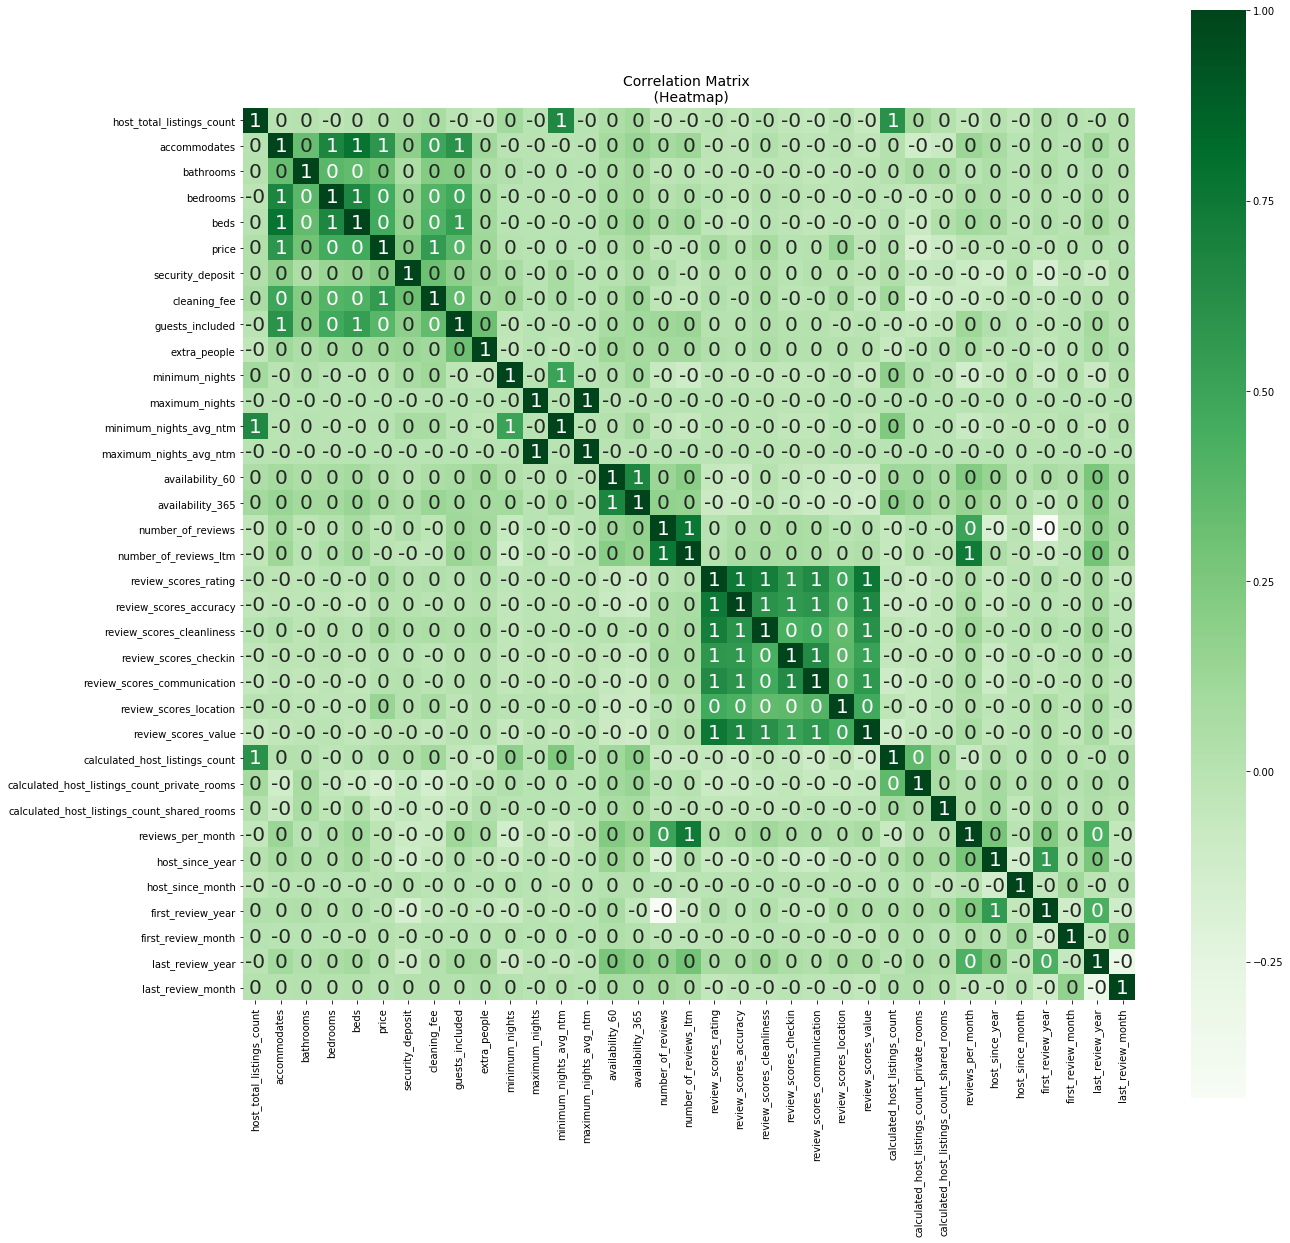

In [31]:
# Our Subsample
corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.0f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Correlation Matrix \n (Heatmap)', fontsize=14)
plt.show()

In [33]:
# Function to LabelEncode all the non numerical values
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [34]:
train_data = create_dummies(train_data)

host_location encoded
host_response_time encoded
host_response_rate encoded
host_is_superhost encoded


F:\Installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


host_neighbourhood encoded
host_verifications encoded
host_has_profile_pic encoded
host_identity_verified encoded
street encoded
neighbourhood_cleansed encoded
neighbourhood_group_cleansed encoded
city encoded
state encoded
zipcode encoded
'<' not supported between instances of 'float' and 'str'
market encoded
smart_location encoded
country_code encoded
country encoded
is_location_exact encoded
property_type encoded
room_type encoded
bed_type encoded
calendar_updated encoded
has_availability encoded
requires_license encoded
instant_bookable encoded
is_business_travel_ready encoded
cancellation_policy encoded
require_guest_profile_picture encoded
require_guest_phone_verification encoded


In [37]:
test_data = create_dummies(test_data)

host_location encoded
host_response_time encoded
host_response_rate encoded
host_is_superhost encoded
host_neighbourhood encoded


F:\Installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


host_verifications encoded
host_has_profile_pic encoded
host_identity_verified encoded
street encoded
neighbourhood_cleansed encoded
neighbourhood_group_cleansed encoded
city encoded
state encoded
zipcode encoded
'<' not supported between instances of 'float' and 'str'
market encoded
smart_location encoded
country_code encoded
country encoded
is_location_exact encoded
property_type encoded
room_type encoded
bed_type encoded
calendar_updated encoded
has_availability encoded
requires_license encoded
instant_bookable encoded
is_business_travel_ready encoded
cancellation_policy encoded
require_guest_profile_picture encoded
require_guest_phone_verification encoded


In [38]:
encoder = LabelEncoder()
train_data["zipcode"] = encoder.fit_transform(train_data["zipcode"].astype(str))
test_data["zipcode"] = encoder.fit_transform(test_data["zipcode"].astype(str))

### Splitting into test and train data

In [40]:
# Spliting target variable and independent variables
X = train_data.drop(['price'], axis = 1)
y = train_data['price']

In [41]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

## Linear Regression

In [42]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [44]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5615980929097204
Adjusted R^2: 0.560580181066237
MAE: 44.60122355425402
MSE: 5045.050795458207
RMSE: 71.02852100007578


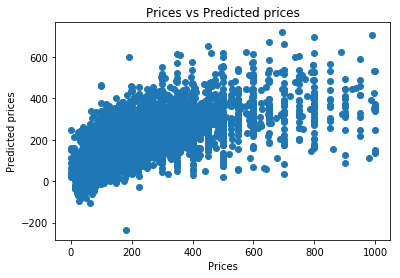

In [45]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

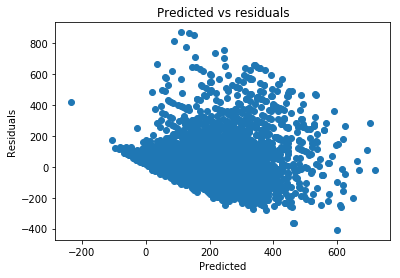

In [46]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

F:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


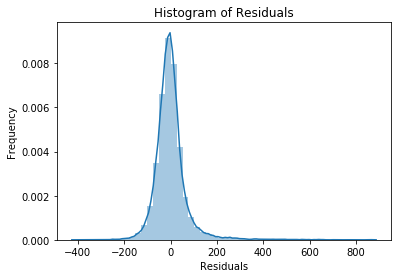

In [47]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [48]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [49]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5761158618363046
Adjusted R^2: 0.5731493681411186
MAE: 44.29567146073889
MSE: 5041.004938610604
RMSE: 71.0000347789394


## Random Forest Regression

In [50]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

## XGBoost Regressor

In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [ ]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## SVM Regression

In [ ]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [ ]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)